<p> Souuce: https://www.youtube.com/watch?v=i4vGKgbtf1U </p>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from sklearn.model_selection import train_test_split
from IPython.display import Image,display

In [ ]:
mpl.rcParams ['figure.figsize'] = (10,8)
mpl.rcParams ['axes.grid'] = False

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv")
df.to_csv("energydata_complete.csv")

<b>Attribute Information:</b>

<li>date time year-month-day hour:minute:second</li>
<li>Appliances, energy use in Wh </li>
<li>lights, energy use of light fixtures in the house in Wh </li>
<li>T1, Temperature in kitchen area, in Celsius </li>
<li>RH_1, Humidity in kitchen area, in %</li>
<li>T2, Temperature in living room area, in Celsius</li>
<li>RH_2, Humidity in living room area, in %</li>
<li>T3, Temperature in laundry room area</li>
<li>RH_3, Humidity in laundry room area, in %</li>
<li>T4, Temperature in office room, in Celsius</li>
<li>RH_4, Humidity in office room, in %</li>
<li>T5, Temperature in bathroom, in Celsius</li>
<li>RH_5, Humidity in bathroom, in %</li>
<li>T6, Temperature outside the building (north side), in Celsius</li>
<li>RH_6, Humidity outside the building (north side), in %</li>
<li>T7, Temperature in ironing room , in Celsius</li>
<li>RH_7, Humidity in ironing room, in %</li>
<li>T8, Temperature in teenager room 2, in Celsius</li>
<li>RH_8, Humidity in teenager room 2, in %</li>
<li>T9, Temperature in parents room, in Celsius</li>
<li>RH_9, Humidity in parents room, in %</li>
<li>To, Temperature outside (from Chievres weather station), in Celsius</li>
<li>Pressure (from Chievres weather station), in mm Hg</li>
<li>RH_out, Humidity outside (from Chievres weather station), in %</li>
<li>Wind speed (from Chievres weather station), in m/s</li>
<li>Visibility (from Chievres weather station), in km</li>
<li>Tdewpoint (from Chievres weather station), Â°C</li>
<li>rv1, Random variable 1, nondimensional</li>
<li>rv2, Random variable 2, nondimensional</li>

In [ ]:
df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.describe()


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [ ]:
df.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,0.019760,0.006955,0.117638,-0.083178,0.025801,-0.055642,0.039572,-0.094039,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015353,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,-0.078745,0.141233,-0.079029,0.153756,-0.135347,0.035069,-0.071458,0.012915,-0.157592,-0.008766,-0.074424,-0.010576,0.068543,0.060281,0.020038,-0.036322,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,0.885247,-0.014782,0.654769,-0.615045,0.838705,0.135182,0.825413,-0.006441,0.844777,0.071756,0.682846,-0.150574,-0.345481,-0.087654,-0.076210,0.571309,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,0.205797,0.303258,0.316141,0.245126,0.021397,0.801122,-0.030053,0.736196,0.115263,0.764001,0.340767,-0.293957,0.274126,0.204932,-0.021057,0.639106,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,0.720550,0.029595,0.801186,-0.580372,0.663660,0.229212,0.578191,0.068534,0.675535,0.157346,0.792255,-0.133028,-0.505291,0.052495,-0.069721,0.582602,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,0.110409,0.250271,-0.009670,0.389933,-0.051422,0.690584,-0.041023,0.679777,0.054544,0.676467,0.033674,-0.255646,0.584911,0.069190,-0.005368,0.499152,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,0.888169,-0.066355,0.686882,-0.647672,0.847374,0.172624,0.795283,0.044427,0.901324,0.134602,0.699417,-0.189974,-0.281718,-0.100776,-0.102310,0.645886,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,-0.050062,0.375422,0.076833,0.514912,-0.250090,0.832685,-0.283228,0.828822,-0.195270,0.833538,0.118207,-0.233274,0.356192,0.263188,0.017041,0.414387,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,0.871813,-0.076489,0.652350,-0.703149,0.877763,0.043527,0.796256,-0.095192,0.889439,-0.025549,0.663478,-0.075292,-0.388602,-0.185747,-0.104768,0.519471,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,0.091812,0.352591,0.259047,0.392178,-0.131204,0.894301,-0.167066,0.847259,-0.044518,0.856591,0.293289,-0.250748,0.336813,0.300192,0.002636,0.616509,-0.001787,-0.001787


In [ ]:
df['date'] = pd.to_datetime( df['date'], infer_datetime_format=True) 

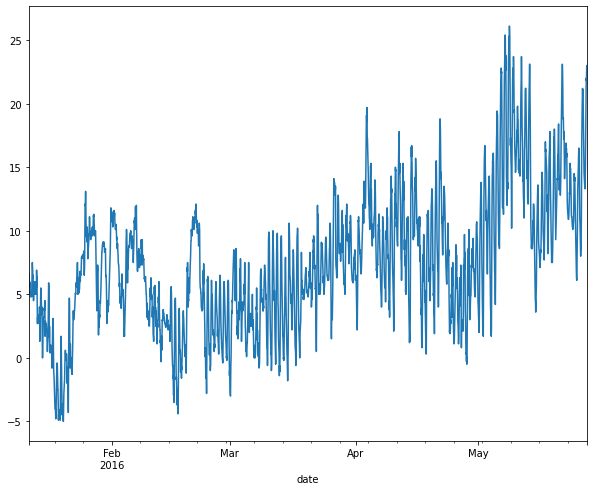

In [ ]:
df.set_index('date')['T_out'].plot()

In [ ]:
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f314c96b4d0>,
      dtype=object)

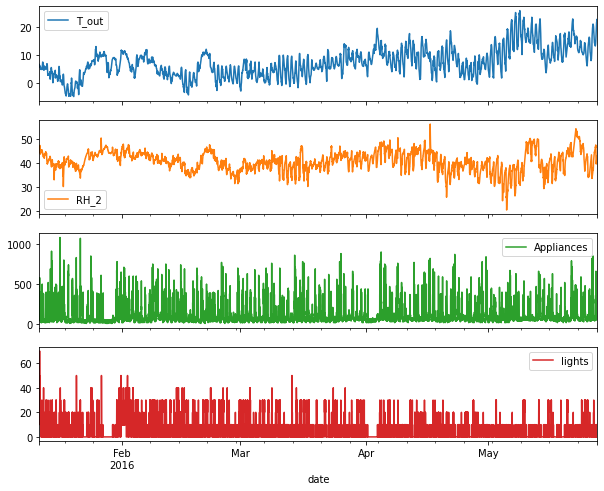

In [ ]:
df.set_index('date')[['T_out','RH_2','Appliances','lights']].plot(subplots=True)

In [ ]:
features = df[['Appliances','T_out','RH_2']].to_numpy().tolist()
target = df['Appliances'].tolist()
              


In [ ]:
features[0:11]

[[60.0, 6.6, 44.79],
 [60.0, 6.48333333333333, 44.7225],
 [50.0, 6.36666666666667, 44.6266666666667],
 [50.0, 6.25, 44.59],
 [60.0, 6.133333333333329, 44.53],
 [50.0, 6.01666666666667, 44.5],
 [60.0, 5.9, 44.5],
 [60.0, 5.91666666666667, 44.5],
 [60.0, 5.93333333333333, 44.433333333333294],
 [70.0, 5.95, 44.4],
 [230.0, 5.96666666666667, 44.4]]

In [ ]:
target[0:11]

[60, 60, 50, 50, 60, 50, 60, 60, 60, 70, 230]

In [ ]:
display (Image('raw_window_1h.png'))
display (Image('split_window1.png'))

In [ ]:
len(features)

19735

In [ ]:
len (target)

19735

In [ ]:
ts_generator = TimeseriesGenerator(features, target,length=6,sampling_rate=6, batch_size =1)

In [ ]:
ts_generator[0]

(array([[[60.  ,  6.6 , 44.79]]]), array([60]))

In [ ]:
ts_generator[0][0][0].shape

(1, 3)

In [ ]:
ts_generator[1]

(array([[[60.        ,  6.48333333, 44.7225    ]]]), array([60]))

In [ ]:
ts_generator[2]

(array([[[50.        ,  6.36666667, 44.62666667]]]), array([60]))

In [ ]:
len(ts_generator)

19729

<p> Input - 1,2,3,4,5,6,7,8,9 </p>

<p>Slide window (window size 3,stride 1) - 1,2,3  2,3,4, 3,4,5 ,4,5,6</p>
<p>Slide window (window size 3,stride 2) - 1,2,3  3,4,5 5,6,7 ,7,8,9</p>
<p>Tumbling window (window size 3)  - 1,2,3 4,5,6 ,7,8,9 </p>

In [ ]:
pd.concat ([df['Appliances'],df['Appliances'].shift(-1),df['Appliances'].shift(-2)],axis=1)

,Appliances,Appliances,Appliances
0,60,60.0,50.0
1,60,50.0,50.0
2,50,50.0,60.0
3,50,60.0,50.0
4,60,50.0,60.0
...,...,...,...
19730,100,90.0,270.0
19731,90,270.0,420.0
19732,270,420.0,430.0
19733,420,430.0,NaN


In [ ]:
multi_target=pd.concat ([df['Appliances'],df['Appliances'].shift(-1),df['Appliances'].shift(-2)],axis=1).dropna().to_numpy().tolist()

In [ ]:
multi_target[0:13]

[[60.0, 60.0, 50.0],
 [60.0, 50.0, 50.0],
 [50.0, 50.0, 60.0],
 [50.0, 60.0, 50.0],
 [60.0, 50.0, 60.0],
 [50.0, 60.0, 60.0],
 [60.0, 60.0, 60.0],
 [60.0, 60.0, 70.0],
 [60.0, 70.0, 230.0],
 [70.0, 230.0, 580.0],
 [230.0, 580.0, 430.0],
 [580.0, 430.0, 250.0],
 [430.0, 250.0, 100.0]]

In [ ]:
features_2 = features[:-2]

In [ ]:
len (features_2)

19733

In [ ]:
ts_generator = TimeseriesGenerator(features_2, multi_target, length=6, sampling_rate=1, batch_size =1,stride=6)

In [ ]:
ts_generator[0]

(array([[[60.        ,  6.6       , 44.79      ],
         [60.        ,  6.48333333, 44.7225    ],
         [50.        ,  6.36666667, 44.62666667],
         [50.        ,  6.25      , 44.59      ],
         [60.        ,  6.13333333, 44.53      ],
         [50.        ,  6.01666667, 44.5       ]]]), array([[60., 60., 60.]]))

In [ ]:
ts_generator[1]

(array([[[ 60.        ,   5.9       ,  44.5       ],
         [ 60.        ,   5.91666667,  44.5       ],
         [ 60.        ,   5.93333333,  44.43333333],
         [ 70.        ,   5.95      ,  44.4       ],
         [230.        ,   5.96666667,  44.4       ],
         [580.        ,   5.98333333,  44.4       ]]]),
 array([[430., 250., 100.]]))

In [ ]:
df_input= df[['Appliances','T_out','RH_2','Visibility']]

In [ ]:
df_input.describe()

,Appliances,T_out,RH_2,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.420420,38.330834
std,102.524891,5.317409,4.069813,11.794719
min,10.000000,-5.000000,20.463333,1.000000
25%,50.000000,3.666667,37.900000,29.000000
50%,60.000000,6.916667,40.500000,40.000000
75%,100.000000,10.408333,43.260000,40.000000
max,1080.000000,26.100000,56.026667,66.000000


In [ ]:
df_input.dtypes


Appliances      int64
T_out         float64
RH_2          float64
Visibility    float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3149711950>,
      dtype=object)

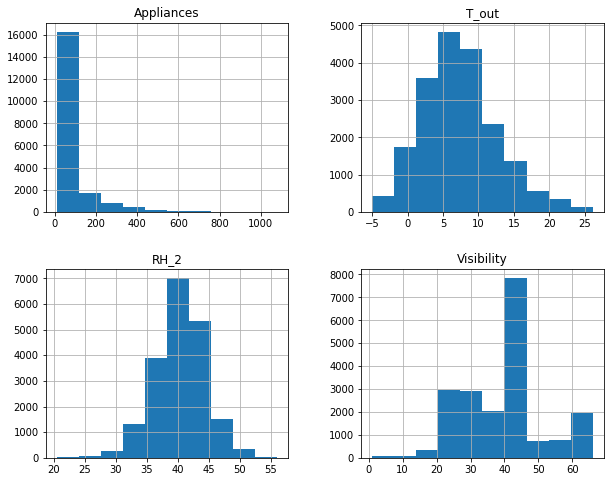

In [ ]:
df_input.hist()

In [ ]:
df_input.query ("Appliances > 500") # outlier

,Appliances,T_out,RH_2,Visibility
11,580,5.983333,44.400000,40.000000
314,520,2.900000,40.900000,36.333333
392,550,2.033333,42.090000,40.000000
393,690,2.100000,42.060000,40.000000
394,620,2.166667,41.726667,40.000000
...,...,...,...,...
19586,600,20.833333,37.528571,40.000000
19587,520,20.900000,37.120000,40.000000
19684,580,15.900000,43.472000,61.000000
19685,660,16.100000,42.595714,61.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [ ]:
scaler = MinMaxScaler ()

In [ ]:
data_scaled = scaler.fit_transform(df_input)

In [ ]:
data_scaled

array([[0.04672897, 0.37299035, 0.68403787, 0.95384615],
       [0.04672897, 0.36923901, 0.68213984, 0.89487179],
       [0.03738318, 0.36548767, 0.67944512, 0.83589744],
       ...,
       [0.24299065, 0.88317256, 0.62719762, 0.37435897],
       [0.38317757, 0.87888532, 0.63471741, 0.38717949],
       [0.39252336, 0.87459807, 0.63290173, 0.4       ]])

In [ ]:
features=data_scaled


In [ ]:
features.size

78940

In [ ]:
target = data_scaled[:,0]

In [ ]:
target

array([0.04672897, 0.04672897, 0.03738318, ..., 0.24299065, 0.38317757,
       0.39252336])

In [ ]:
target.size

19735

In [ ]:
TimeseriesGenerator(features, target,length=2,sampling_rate=1, batch_size =1)[0]

(array([[[0.04672897, 0.37299035, 0.68403787, 0.95384615],
         [0.04672897, 0.36923901, 0.68213984, 0.89487179]]]),
 array([0.03738318]))

In [ ]:
X_train,X_test,y_train,y_test = train_test_split (features,target,test_size=.20,random_state=123,shuffle = False)

In [ ]:
X_train.shape

(15788, 4)

In [ ]:
X_test.shape

(3947, 4)

In [ ]:
win_length = 720
batch_size = 32 
num_features = 4
train_generator = TimeseriesGenerator(X_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(X_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [ ]:
len (train_generator)

471

In [ ]:
model = tf.keras.Sequential()

In [ ]:
model.add (tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add (tf.keras.layers.LeakyReLU(alpha=0.5))
model.add (tf.keras.layers.LSTM(128,return_sequences=True))
model.add (tf.keras.layers.LeakyReLU(alpha=0.5))
model.add (tf.keras.layers.Dropout(0.3))
model.add (tf.keras.layers.LSTM(64,return_sequences=True))
model.add (tf.keras.layers.Dropout(0.3))
model.add (tf.keras.layers.Dense(1))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 128)          68096     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 720, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout (Dropout)           (None, 720, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 720, 64)           49408     
                                                                 
 dropout_1 (Dropout)         (None, 720, 64)           0

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='vol_loss',patience=2,mode='min')
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])
history = model.fit_generator(train_generator,epochs=50,validation_data=test_generator, shuffle=False, callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


471/471 [==============================] - 928s 2s/step - loss: 0.0103 - mean_absolute_error: 0.0588 - val_loss: 0.0072 - val_mean_absolute_error: 0.0447
Epoch 2/50
471/471 [==============================] - 920s 2s/step - loss: 0.0098 - mean_absolute_error: 0.0583 - val_loss: 0.0072 - val_mean_absolute_error: 0.0446
Epoch 3/50
471/471 [==============================] - 916s 2s/step - loss: 0.0097 - mean_absolute_error: 0.0579 - val_loss: 0.0072 - val_mean_absolute_error: 0.0447
Epoch 4/50
471/471 [==============================] - 920s 2s/step - loss: 0.0097 - mean_absolute_error: 0.0578 - val_loss: 0.0072 - val_mean_absolute_error: 0.0449
Epoch 5/50
471/471 [==============================] - 920s 2s/step - loss: 0.0096 - mean_absolute_error: 0.0578 - val_loss: 0.0072 - val_mean_absolute_error: 0.0452
Epoch 6/50
471/471 [==============================] - 916s 2s/step - loss: 0.0096 - mean_absolute_error: 0.0578 - val_loss: 0.0072 - val_mean_absolute_error: 0.0454
Epoch 7/50
471/471 [=

In [ ]:
model.evaluate_generator (test_generator,verbose=0)


In [ ]:
predictions = model.predict_generator(test_generator)

In [ ]:
predictions.shape[0]

In [ ]:
predictions

In [ ]:
y_test

In [ ]:
X_test[:,1:][win_length:]

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(X_test[;,1:][win_length:])],axis=1)

In [ ]:
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

In [ ]:
df_final = df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

In [ ]:
df_final['App_pred']=rev_trans[:,0]

In [ ]:
df_final

In [ ]:
df_final['Appliances','App_pred',].plot()